In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

****PS: I wanted to use the Reviews Data and the tip data for this Analysis but for some reason when reading the Review Data it was taking too long to read the data (I think its because its 6.98 GB of data that is trying to be read) so I just ended up doing the analysis with just a combination of the tip and business data im gonna try and find a way to get the reviews data to work also *****

# Sentiment Analysis On Yelp Data 

#### Name: Ajanthan Mathialagan 
#### Student Number: 500768117
#### Supervisor : Bilgehan Erdem

# Importing The Data

In [108]:
business_json_path = 'yelp_academic_dataset_business.json'
#review_json_path = 'yelp_academic_dataset_review.json'  
tip_json_path = 'yelp_academic_dataset_tip.json'

In [109]:
df_b = pd.read_json(business_json_path, lines = True)

In [110]:
#df_r = pd.read_json(review_json_path, lines = True)

In [111]:
df_t = pd.read_json(tip_json_path, lines = True)

In [112]:
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [118]:
df_t.head()

,user_id,business_id,text,date,compliment_count
0,WCjg0jdHXMlwbqS9tZUx8Q,ENwBByjpoa5Gg7tKgxqwLg,Carne asada chips...,2011-07-22 19:07:35,0
1,42-Z02y9bABShAGZhuSzrQ,jKO4Og6ucdX2-YCTKQVYjg,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
2,5u7E3LYp_3eB8dLuUBazXQ,9Bto7mky640ocgezVKSfVg,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
3,wDWoMG5N9oI4DJ-p7z8EBg,XWFjKtRGZ9khRGtGg2ZvaA,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
4,JmuFlorjjRshHTKzTwNtgg,mkrx0VhSMU3p3uhyJGCoWA,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0


In [119]:
#df_r.head()

### Creating The Main Dataframe

Ill combine both the business data set and the tips dataset using the businesses_id provided in both of the datasets. Based on the tip data set. 

In [120]:
df_b.set_index('business_id', inplace=True)

In [121]:
df_t.set_index('business_id', inplace = True)

In [122]:
df_b.head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
business_id,,,,,,,,,,,,,
6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [123]:
df_t.head()

,user_id,text,date,compliment_count
business_id,,,,
ENwBByjpoa5Gg7tKgxqwLg,WCjg0jdHXMlwbqS9tZUx8Q,Carne asada chips...,2011-07-22 19:07:35,0
jKO4Og6ucdX2-YCTKQVYjg,42-Z02y9bABShAGZhuSzrQ,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
9Bto7mky640ocgezVKSfVg,5u7E3LYp_3eB8dLuUBazXQ,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
XWFjKtRGZ9khRGtGg2ZvaA,wDWoMG5N9oI4DJ-p7z8EBg,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
mkrx0VhSMU3p3uhyJGCoWA,JmuFlorjjRshHTKzTwNtgg,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0


In [124]:
#df_r.head()

In [125]:
#merge data frames based on business_id 

In [180]:
df_main = pd.merge(df_b, df_t, left_on='business_id', right_on='business_id', how='left')
df_main2 = df_main.copy()

### Cleaning the Data 

Cleaning the Data involves filtering out the unwanted information and relabeling columns if necessary and changing columns to there appropriate data types if required.

In [127]:
#drop unwanted columns that we will not use for this analysis
df_main = df_main.drop(['user_id', 'is_open', 'hours'], axis = 1)

We will be looking at the Canadian City Vancouver with 5 star restuarants. Compare the tips provided from the top restuarants to the poorly rated restuarants that are rated 2 stars or below on Yelp in the city of Vancouver

In [136]:
#looking at data of business where text for tip is not missing and reviews is not missing 
#df = df[df['text'].notna() & df['review'].notna()]
df_van = df_main[df_van['text'].notna()]

In [139]:
df_van = df_main[df_van["city"] == 'Vancouver']

In [140]:
df_van = df_main[df_van['stars'] == 5]

In [141]:
df_van.head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,text,date,compliment_count
business_id,,,,,,,,,,,,,,
cf3cpzJKYcwYYLwCdZt4nw,Active NW,8050 E Mill Plain Blvd,Vancouver,WA,98664,45.625263,-122.589948,5.0,6,None,"Sports Wear, Fashion, Sporting Goods, Shopping...",Active NW appears to no longer be in business ...,2019-09-12 00:02:20,0.0
Jty06K7-b5v_bE6hlSXLBg,It’s An Adjustment! Chiropractic,"9013 NE Hwy 99, Ste 5",Vancouver,WA,98665,45.687791,-122.658276,5.0,5,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Chiropractors, Health & Medical",Dr Rick is so friendly and I love that i can j...,2018-11-27 05:52:14,0.0
Jty06K7-b5v_bE6hlSXLBg,It’s An Adjustment! Chiropractic,"9013 NE Hwy 99, Ste 5",Vancouver,WA,98665,45.687791,-122.658276,5.0,5,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Chiropractors, Health & Medical",They do not take insurance,2019-02-22 23:37:10,0.0
ZaXlET9uaNQjlj8goZF18w,Clear Hair Studio,1249 Burrard Street,Vancouver,BC,V6Z 1Z5,49.278691,-123.130267,5.0,9,"{'BusinessParking': '{'garage': False, 'street...","Nail Salons, Beauty & Spas, Hair Salons","Boyfriend is obsessed with Lucas, love the mad...",2013-02-14 23:46:51,0.0
umx-MG4EvFoXWMH0FK52ew,Lunatic Tattoo,"5620 NE Gher Rd, Ste B",Vancouver,WA,98662,45.663617,-122.561468,5.0,14,"{'ByAppointmentOnly': 'False', 'BusinessParkin...","Piercing, Professional Services, Tattoo, Shopp...",Watching the bf get his first tattoo.,2011-01-02 05:20:19,0.0


In [142]:
#looking if there still included any null values in the text column for the dataframe
df_van.isnull().sum(axis=0)

name                 0
address              0
city                 0
state                0
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
attributes          97
categories           0
text                 0
date                 0
compliment_count     0
dtype: int64

In [143]:
#dimension of the dataset 
df_van.shape

(100, 4)

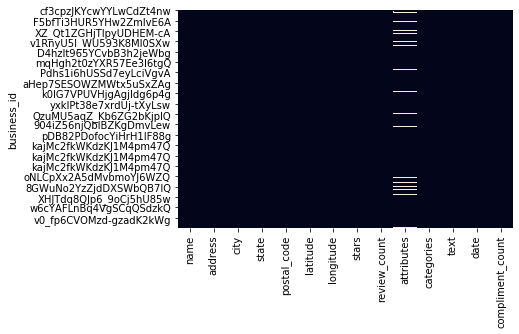

In [145]:
#heat map of the null values
sns.heatmap(df_van.isnull(),cbar= False)

In [146]:
#since the text data is object type we must change it to string type to enable us to do further analysis on the column
df_van.dtypes

name                        object
address                     object
city                        object
state                       object
postal_code                 object
latitude                   float64
longitude                  float64
stars                      float64
review_count                 int64
attributes                  object
categories                  object
text                        object
date                datetime64[ns]
compliment_count           float64
dtype: object

In [147]:
df_van['text'].astype(str)

business_id
cf3cpzJKYcwYYLwCdZt4nw    Active NW appears to no longer be in business ...
Jty06K7-b5v_bE6hlSXLBg    Dr Rick is so friendly and I love that i can j...
Jty06K7-b5v_bE6hlSXLBg                           They do not take insurance
ZaXlET9uaNQjlj8goZF18w    Boyfriend is obsessed with Lucas, love the mad...
umx-MG4EvFoXWMH0FK52ew                Watching the bf get his first tattoo.
                                                ...                        
g6F_Mdi63zQM5QBVygmJmg    If you are into spicy get extra spicy as it's ...
g6F_Mdi63zQM5QBVygmJmg         Great sandwiches and the fries were amazing!
WZedGaPLxiHYtVG-ugYXRw    "Expert , very liable , good customer service ...
XQVBnPnZR-Wjwp3JSdolmg    They offer ELECTRIC toothbruses after the visi...
4qIIlNT5ERlCdeVEDFP3Yg                                   Super cute decor!!
Name: text, Length: 1152, dtype: object

Next, let’s perform a simple preprocessing on the content on the text column to make them more amenable for analysis since it doesn't have any missing data in it. Thus it will provide us with reliable results.
To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [148]:
import re

In [151]:
#reset index values 
df_van.reset_index(inplace=True)

In [152]:
df_van.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,text,date,compliment_count
0,cf3cpzJKYcwYYLwCdZt4nw,Active NW,8050 E Mill Plain Blvd,Vancouver,WA,98664,45.625263,-122.589948,5.0,6,None,"Sports Wear, Fashion, Sporting Goods, Shopping...",Active NW appears to no longer be in business ...,2019-09-12 00:02:20,0.0
1,Jty06K7-b5v_bE6hlSXLBg,It’s An Adjustment! Chiropractic,"9013 NE Hwy 99, Ste 5",Vancouver,WA,98665,45.687791,-122.658276,5.0,5,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Chiropractors, Health & Medical",Dr Rick is so friendly and I love that i can j...,2018-11-27 05:52:14,0.0
2,Jty06K7-b5v_bE6hlSXLBg,It’s An Adjustment! Chiropractic,"9013 NE Hwy 99, Ste 5",Vancouver,WA,98665,45.687791,-122.658276,5.0,5,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Chiropractors, Health & Medical",They do not take insurance,2019-02-22 23:37:10,0.0
3,ZaXlET9uaNQjlj8goZF18w,Clear Hair Studio,1249 Burrard Street,Vancouver,BC,V6Z 1Z5,49.278691,-123.130267,5.0,9,"{'BusinessParking': '{'garage': False, 'street...","Nail Salons, Beauty & Spas, Hair Salons","Boyfriend is obsessed with Lucas, love the mad...",2013-02-14 23:46:51,0.0
4,umx-MG4EvFoXWMH0FK52ew,Lunatic Tattoo,"5620 NE Gher Rd, Ste B",Vancouver,WA,98662,45.663617,-122.561468,5.0,14,"{'ByAppointmentOnly': 'False', 'BusinessParkin...","Piercing, Professional Services, Tattoo, Shopp...",Watching the bf get his first tattoo.,2011-01-02 05:20:19,0.0


In [153]:
df_van['text'] = \
df_van['text'].map(lambda x: x.lower())

## Explanatory Analysis: 5 Star Rated Restuarants in Vancouver

To verify whether the preprocessing steps must be taken further, we’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

In [63]:
#!pip install wordcloud

In [154]:
from wordcloud import WordCloud

In [156]:
long_string = ','.join(list(df_van['text'].values))

In [157]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [158]:
wordcloud.generate(long_string)


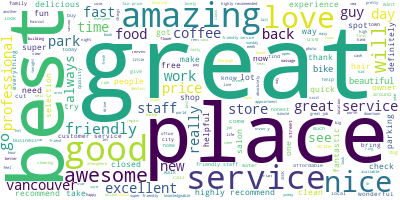

In [159]:
wordcloud.to_image()

The bigger the word in the wordcloud the more times it occurs in the text. Since we are viewing all the 5 star restuarants in the city of Vancouver we can see that the most popular words are great food, amazing, place, love, awesome, etc. Which we can say are positive to see when looking at 5 star reviewed restuarants

In [160]:
import gensim

In [161]:
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajanthanm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [162]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [163]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data2 = df_van.text.values.tolist()
data_words = list(sent_to_words(data2))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['active', 'nw', 'appears', 'longer', 'business', 'september']


In [164]:
import gensim.corpora as corpora

In [165]:
#Create Dicitionary 
id2word = corpora.Dictionary(data_words)
#Create Corpus
texts = data_words
#Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


### Creating a LDA Model

We will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [166]:
from pprint import pprint

In [167]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"best" + 0.011*"friendly" + 0.010*"service" + 0.009*"excellent" + '
  '0.008*"super" + 0.008*"beautiful" + 0.008*"go" + 0.008*"amazing" + '
  '0.006*"nice" + 0.006*"great"'),
 (1,
  '0.045*"great" + 0.028*"service" + 0.026*"place" + 0.013*"amazing" + '
  '0.013*"get" + 0.013*"awesome" + 0.009*"like" + 0.008*"friendly" + '
  '0.007*"love" + 0.006*"experience"'),
 (2,
  '0.032*"great" + 0.015*"best" + 0.009*"go" + 0.008*"shop" + 0.006*"amazing" '
  '+ 0.006*"back" + 0.006*"park" + 0.005*"place" + 0.005*"job" + '
  '0.005*"today"'),
 (3,
  '0.018*"great" + 0.010*"service" + 0.009*"best" + 0.009*"awesome" + '
  '0.008*"work" + 0.008*"nice" + 0.008*"price" + 0.008*"really" + 0.007*"get" '
  '+ 0.007*"thanks"'),
 (4,
  '0.030*"great" + 0.014*"place" + 0.009*"new" + 0.007*"love" + 0.007*"nice" + '
  '0.007*"best" + 0.006*"service" + 0.005*"experience" + 0.005*"work" + '
  '0.005*"professional"'),
 (5,
  '0.026*"best" + 0.022*"good" + 0.022*"great" + 0.015*"friendly" + '
  '0.013

### Analyzing LDA model Results

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. THe table below shows the dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic.

In [169]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=df_van):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)



In [170]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

In [171]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.8714,"service, great, best, friendly, recommend, pla...","[active, nw, appears, longer, business, septem..."
1,1,8.0,0.9000,"great, amazing, good, day, best, recommend, se...","[dr, rick, friendly, love, drop, back, feels, ..."
2,2,7.0,0.6999,"place, free, great, awesome, parking, back, go...","[take, insurance]"
3,3,8.0,0.9100,"great, amazing, good, day, best, recommend, se...","[boyfriend, obsessed, lucas, love, madman, loo..."
4,4,1.0,0.8500,"great, service, place, amazing, get, awesome, ...","[watching, bf, get, first, tattoo]"
5,5,5.0,0.8500,"best, good, great, friendly, staff, service, f...","[probably, favorite, tattoo, studio, time]"
6,6,1.0,0.7000,"great, service, place, amazing, get, awesome, ...","[great, service]"
7,7,1.0,0.9250,"great, service, place, amazing, get, awesome, ...","[love, place, finally, able, get, caffeine, ne..."
8,8,1.0,0.9100,"great, service, place, amazing, get, awesome, ...","[love, place, yo, daughter, gives, break, go, ..."
9,9,7.0,0.6999,"place, free, great, awesome, parking, back, go...","[think, business]"


When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

I will plot the word counts and the weights of each keyword in the same chart.

We want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. In our case that word is comment. It shows up in multiple topics and has relative frequency which is more than the weight.

In [172]:
from collections import Counter

In [173]:
import matplotlib.colors as mcolors

In [174]:
topics = lda_model.show_topics(formatted=False)

In [175]:
data_flat = [w for w_list in data_words for w in w_list]

In [176]:
counter = Counter(data_flat)

In [177]:
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

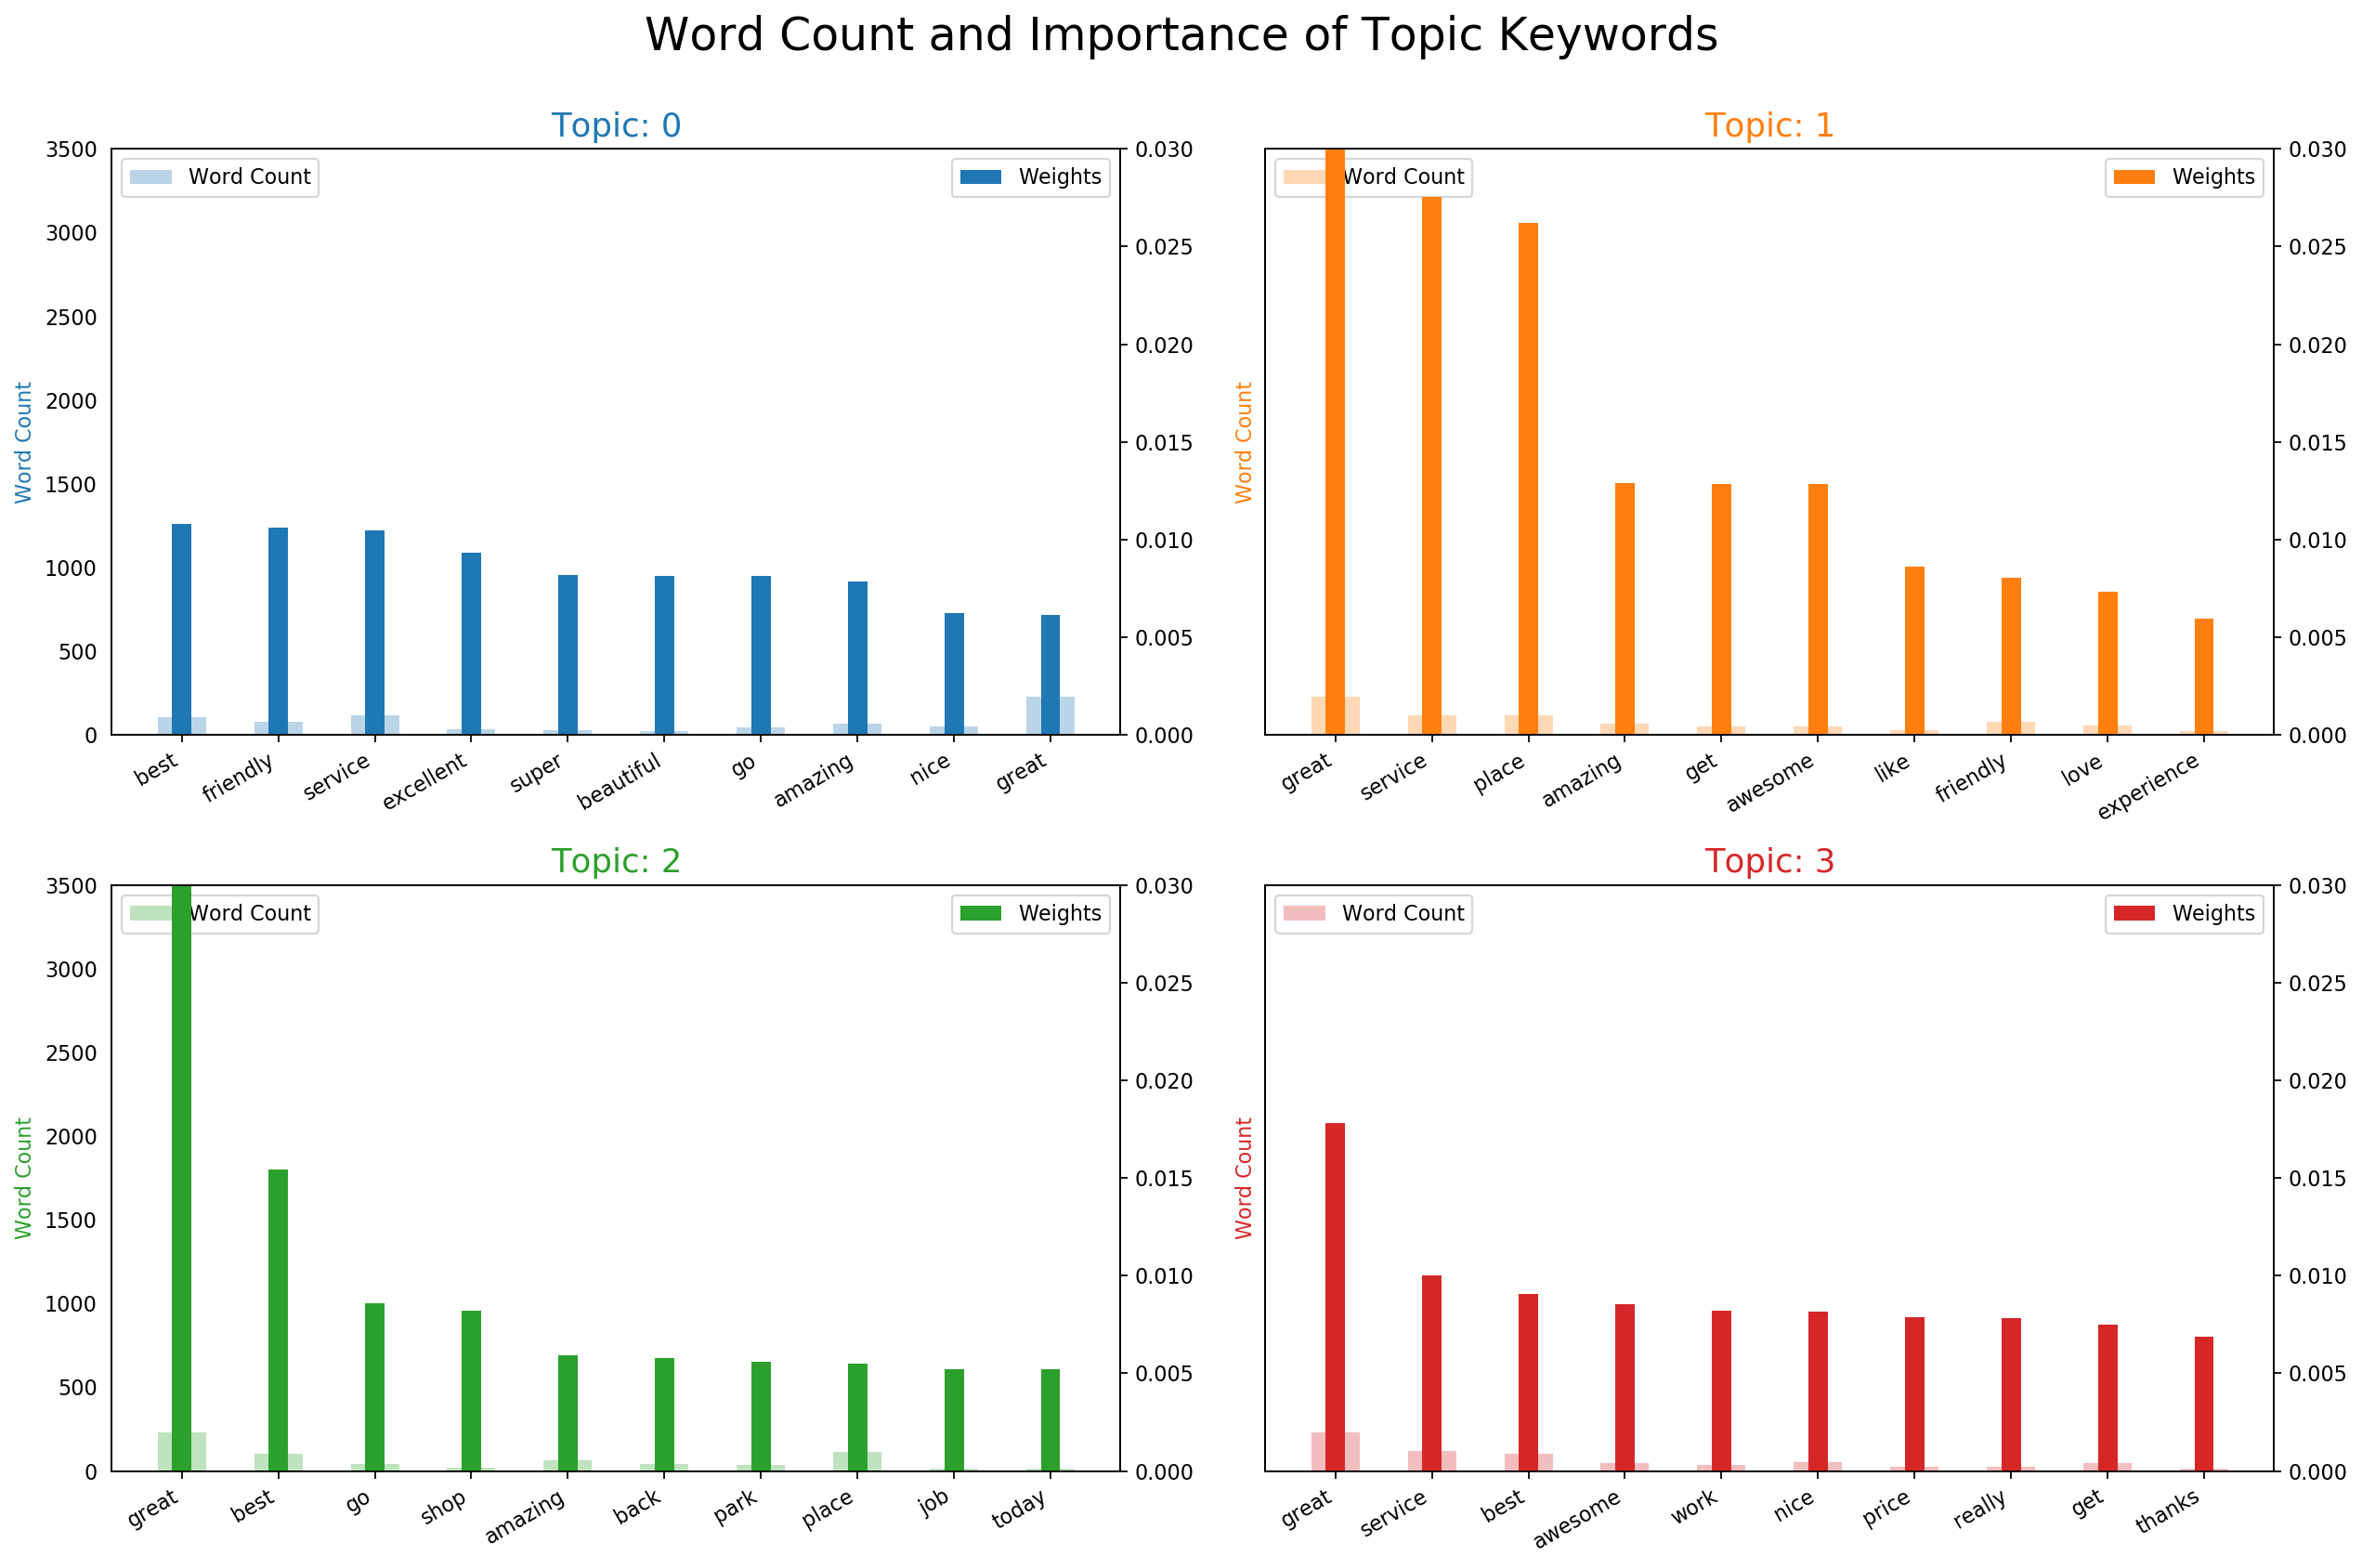

In [178]:
#Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

Based on this visualization we can see the most common words provided by the customers tips based on the topic that were assigned by the LDA algorithm. For instance in Topic 0 we see key words such as best, friendly, service, excellent, super, beautiful, etc. These are all positive words that customers have shown on the tips for the 5 star rated restuarants. We can also see that the weight of the words are higher than the word count. 

# Conclusion: In Progress .... 